In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Now some of Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data & EDA

In [2]:
df= pd.DataFrame(pd.read_csv("clean_data.csv"))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,May 20 2022,109.57,109.90,105.01,107.59,107.59,99500000
1,May 19 2022,106.28,110.03,106.19,107.32,107.32,88142000
2,May 18 2022,111.44,112.85,106.25,107.11,107.11,108380000
3,May 17 2022,113.28,115.80,111.28,115.37,115.37,76448000
4,May 16 2022,113.10,113.99,110.35,110.81,110.81,74566000


*Setting Date to Index*

In [3]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
May 20 2022,109.57,109.90,105.01,107.59,107.59,99500000
May 19 2022,106.28,110.03,106.19,107.32,107.32,88142000
May 18 2022,111.44,112.85,106.25,107.11,107.11,108380000
May 17 2022,113.28,115.80,111.28,115.37,115.37,76448000
May 16 2022,113.10,113.99,110.35,110.81,110.81,74566000


Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

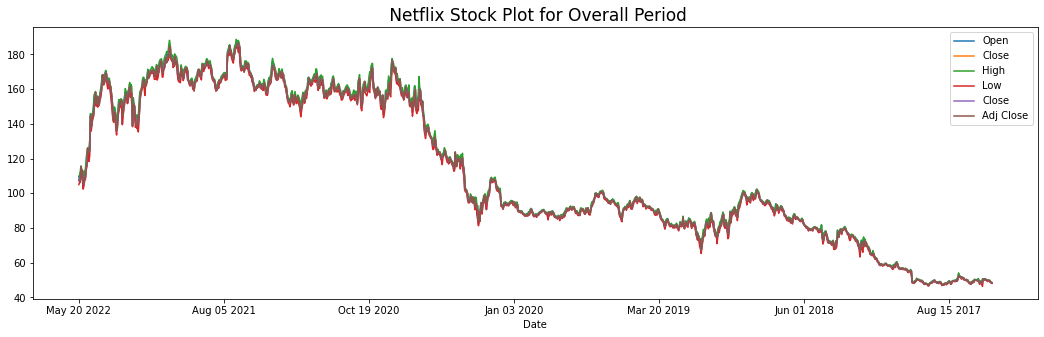

In [4]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

**Top-5 Dates with Highest Stock Price**

In [5]:
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
Jul 13 2021    188.65
Nov 19 2021    188.11
Jul 08 2021    188.00
Jul 12 2021    187.86
Jul 09 2021    187.40
Name: High, dtype: float64

**Top-5 Dates with Lowest Stock Price**

In [6]:
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
Jun 09 2017    46.35
Sep 26 2017    46.59
Sep 25 2017    46.64
Aug 29 2017    46.82
Aug 24 2017    47.06
Name: Low, dtype: float64

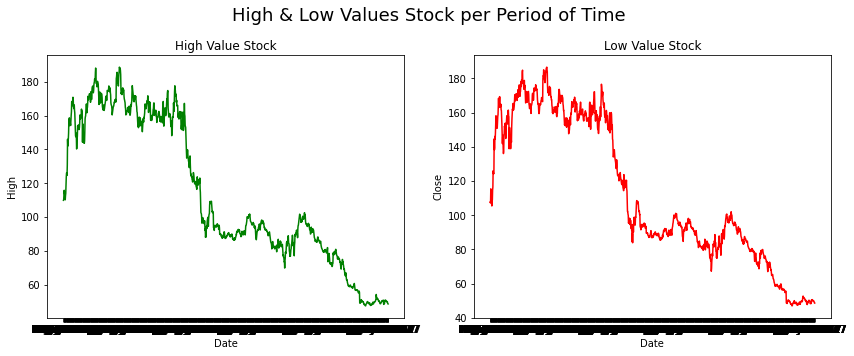

In [7]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

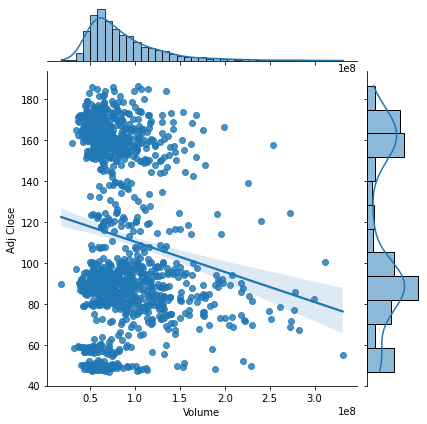

In [8]:
sns.jointplot(x='Volume', y='Adj Close', data=df, kind='reg')

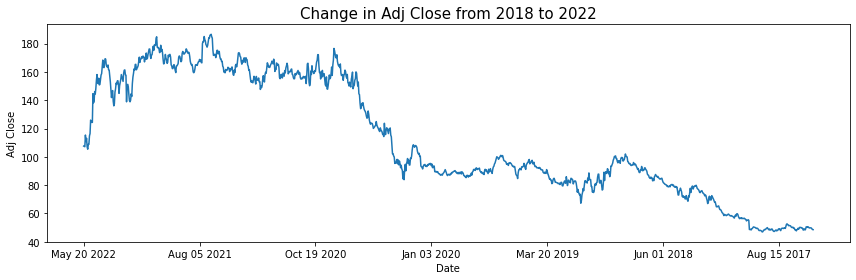

In [9]:
plt.figure(figsize=(12,4))
df['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2018 to 2022',fontsize= 15)
plt.tight_layout()

# Netflix Stock Daily Returns

In [10]:
df['Daily_returns'] = df['Adj Close'].pct_change() #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
May 20 2022,109.57,109.90,105.01,107.59,107.59,99500000,NaN
May 19 2022,106.28,110.03,106.19,107.32,107.32,88142000,-0.002510
May 18 2022,111.44,112.85,106.25,107.11,107.11,108380000,-0.001957
May 17 2022,113.28,115.80,111.28,115.37,115.37,76448000,0.077117
May 16 2022,113.10,113.99,110.35,110.81,110.81,74566000,-0.039525


 **Best Day of Stock**

In [11]:
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
Apr 28 2022    0.163502
Name: Daily_returns, dtype: float64

 **Worst day of Stock**

In [12]:
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
Feb 03 2022   -0.119196
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Netflix Stock Daily Returns')

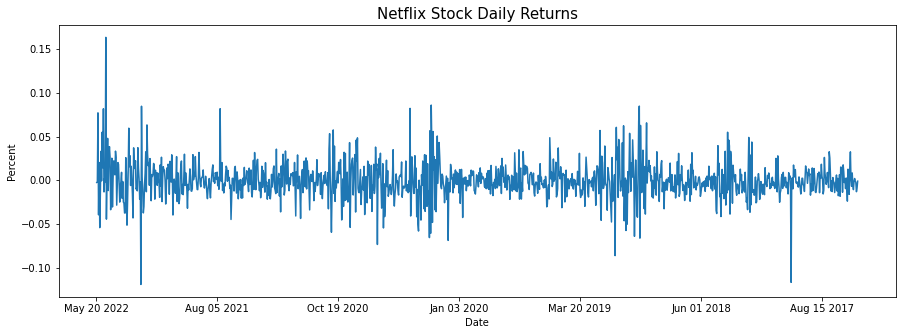

In [13]:
plt.figure(figsize=(15,5))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Daily Returns",fontsize= 15 )

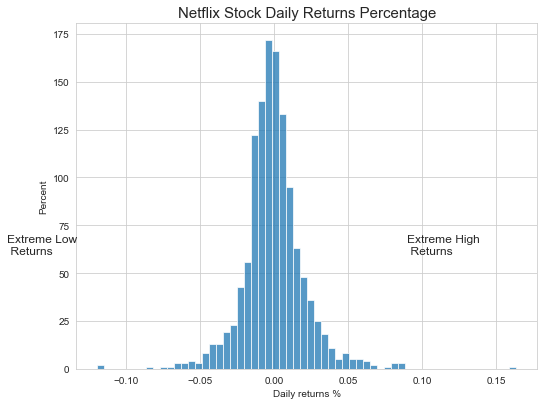

In [14]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()


# Netflix Stock Cumulative Returns

In [15]:
df['Cum_returns']= (df['Daily_returns']+1).cumprod()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
May 20 2022,109.57,109.90,105.01,107.59,107.59,99500000,NaN,NaN
May 19 2022,106.28,110.03,106.19,107.32,107.32,88142000,-0.002510,0.997490
May 18 2022,111.44,112.85,106.25,107.11,107.11,108380000,-0.001957,0.995539
May 17 2022,113.28,115.80,111.28,115.37,115.37,76448000,0.077117,1.072312
May 16 2022,113.10,113.99,110.35,110.81,110.81,74566000,-0.039525,1.029928


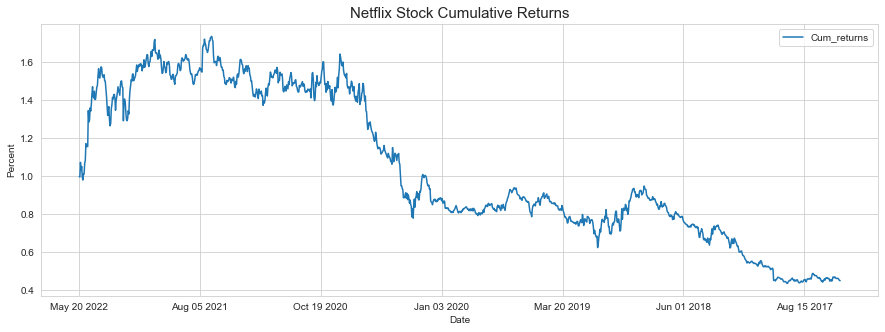

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df['Cum_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Cumulative Returns",fontsize= 15 )
plt.legend()

# Moving Average of Stock

In [18]:
# sns.set_style('whitegrid')
# f= plt.figure(figsize=(12,5))
# df['Close'].loc['2019-01-01': '2019-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
# df['Close'].loc['2019-01-01':'2019-12-31'].plot(label='CLOSE price')
# plt.title(" Comparison of the moving average & Close price for the year 2008", fontsize=17)
# plt.legend()

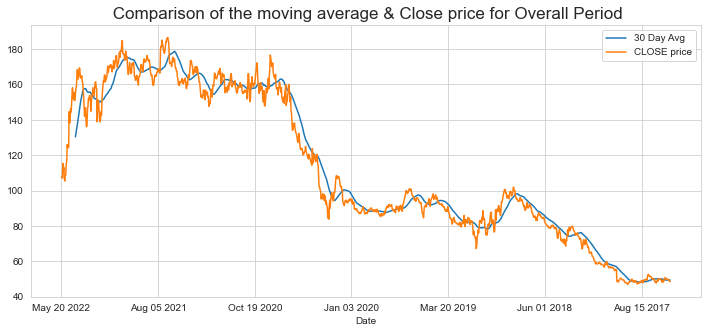

In [19]:
f= plt.figure(figsize=(12,5))
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for Overall Period", fontsize=17)
plt.legend()

In [20]:
df['Mean Avg 30Day'] = df['Close'].rolling(window=30).mean() # MA= mean Average
df['STD 30Day'] = df['Close'].rolling(window=30).std()

In [21]:
df['Upper Band']= df['Mean Avg 30Day'] + (df['STD 30Day'] *2)
df['Lower Band']= df['Mean Avg 30Day'] - (df['STD 30Day'] *2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns,Mean Avg 30Day,STD 30Day,Upper Band,Lower Band
Date,,,,,,,,,,,,
May 20 2022,109.57,109.90,105.01,107.59,107.59,99500000,NaN,NaN,NaN,NaN,NaN,NaN
May 19 2022,106.28,110.03,106.19,107.32,107.32,88142000,-0.002510,0.997490,NaN,NaN,NaN,NaN
May 18 2022,111.44,112.85,106.25,107.11,107.11,108380000,-0.001957,0.995539,NaN,NaN,NaN,NaN
May 17 2022,113.28,115.80,111.28,115.37,115.37,76448000,0.077117,1.072312,NaN,NaN,NaN,NaN
May 16 2022,113.10,113.99,110.35,110.81,110.81,74566000,-0.039525,1.029928,NaN,NaN,NaN,NaN


Text(0.5, 1.0, ' Bollinger Band Plot for Overall Period')

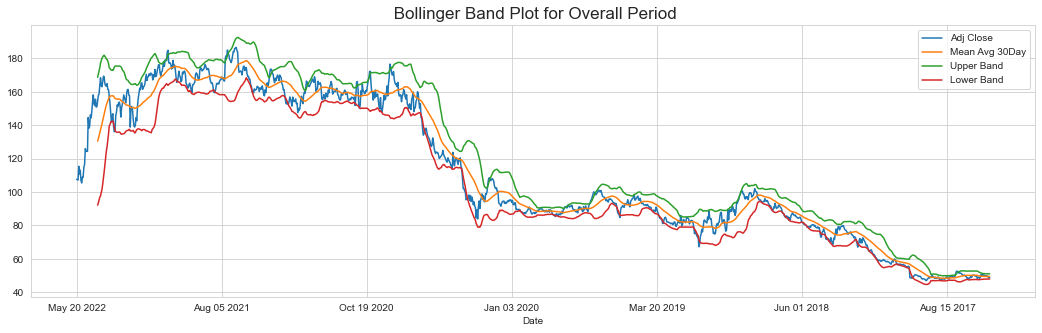

In [22]:
df[['Adj Close', 'Mean Avg 30Day', 'Upper Band', 'Lower Band']].plot(figsize=(18,5))
plt.title(" Bollinger Band Plot for Overall Period", fontsize=17)

# Train & Test Data

*Importing Models*

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [28]:
X= df[['Open', 'High', 'Low']]
y= df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

*Scaling of Data*

In [29]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

*Applying Model*

In [30]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[107.94847533 123.25224167 136.4691      86.02438853 164.7973114
 141.674678   165.28992779 120.03914433 155.25216982 107.6008233
  89.2922165   55.88132     95.80840836 150.6135671   93.42619583
  87.9478969   81.59222108  49.43869917 157.52176245  95.23370427
  99.26929329 184.03025333  97.15896012 128.40846     49.51002913
 178.12078905  75.34617599  79.15050848 157.26721737  88.11366881
 164.7340696   81.82216193  48.06849665 155.45037701  48.64132606
  89.48382881  93.3049261   93.48894917 137.91744    152.1277656
 173.03345159  65.32246     48.06883665  47.92437333  76.2611029
 107.37224792  47.56093667  58.851432   171.52850123  94.63568417
  90.18576183 164.35243974  62.50476    149.21138953  88.74122941
 165.13154926  73.29552829  58.19840133 163.62378252 163.63605306
 155.69939662  88.37666615  72.18952813 163.98686825 166.28296849
  90.96537075  92.45966814 104.21544     70.6837327   64.78224
 164.86485977 166.39980567  71.99612498 122.11172    169.87536048
  99.39985246  89

*Statical Metrics and Performance Evaluation*

In [31]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.8273
Mean Squared Error: 1.5637
Root Mean Squared Error: 1.2505
(R^2) Score: 0.9991
Train Score : 99.99% and Test Score : 99.91% using Random Tree Regressor.
Accuracy: 99.25 %.


# Predictions

In [ ]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

In [ ]:
print(predictions)

 **One Year Prediction**

In [ ]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(12, 6), color="blue")
plt.title("Forecast for the next 1 year", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

**One Month Prediction**

In [ ]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 1 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

**5 Days Prediction** 

In [ ]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy,'\n')
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 5 days",size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

**Done**